In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [4]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
39106,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
import matplotlib.pyplot as plt 

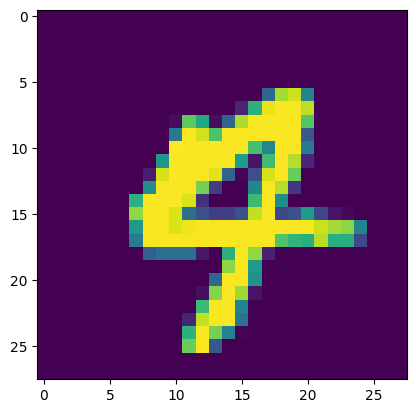

In [8]:
plt.imshow(df.iloc[39106,1:].values.reshape(28,28))

In [9]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [10]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
x_train.head(3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
34941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier()

knn

KNeighborsClassifier()

In [19]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [20]:
# import time

# start = time.time()

y_pred = knn.predict(x_test)

# print(time.time() - start())

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9648809523809524

In [22]:
## Now PCA applying
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [23]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 120)

In [26]:
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [27]:
x_train_trf.shape

(33600, 120)

In [31]:
knn1 = KNeighborsClassifier()

In [32]:
knn1.fit(x_train_trf,y_train)

KNeighborsClassifier()

In [33]:
y_pred = knn1.predict(x_test_trf)

In [34]:
accuracy_score(y_test,y_pred)

0.9538095238095238

In [35]:
for i in range(1,785):
    pca = PCA(n_components = i)
    x_train_trf = pca.fit_transform(x_train)
    x_test_trf = pca.transform(x_test)
    
    knn1 = KNeighborsClassifier()
    knn1.fit(x_train_trf,y_train)
    y_pred = knn1.predict(x_test_trf)
    
    print(accuracy_score(y_test,y_pred))



0.25726190476190475
0.32416666666666666
0.5104761904761905
0.6661904761904762
0.7376190476190476
0.8226190476190476
0.8435714285714285
0.8720238095238095
0.8867857142857143
0.9055952380952381
0.9120238095238096
0.9192857142857143
0.9280952380952381
0.9346428571428571
0.9369047619047619
0.9382142857142857
0.9411904761904762
0.9401190476190476
0.9423809523809524
0.9441666666666667
0.9444047619047619
0.9444047619047619
0.9454761904761905
0.9452380952380952
0.9477380952380953
0.9485714285714286
0.9467857142857142
0.9471428571428572
0.9491666666666667
0.9497619047619048
0.950595238095238
0.9513095238095238
0.9498809523809524
0.9502380952380952
0.9514285714285714
0.9517857142857142
0.9514285714285714
0.9521428571428572
0.9522619047619048
0.9532142857142857
0.9522619047619048
0.9522619047619048
0.9522619047619048
0.9551190476190476
0.9538095238095238
0.9533333333333334
0.9532142857142857
0.9541666666666667
0.9530952380952381
0.9533333333333334
0.9525
0.9532142857142857
0.9547619047619048
0.95

KeyboardInterrupt: 

In [36]:
## Transforming into 2D
pca = PCA(n_components = 2)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [37]:
x_train_trf

array([[-2.71866339, -0.49063495],
       [-0.67692144, -6.75294411],
       [-3.03321813,  6.51042391],
       ...,
       [ 2.14887196,  0.78125977],
       [ 1.05950927,  0.94651474],
       [17.70255706,  1.96108233]])

In [38]:
import plotly.express as px
y_train_trf = y_train.astype(str)

fig = px.scatter(
    x = x_train_trf[:,0],
    y = x_train_trf[:,1],
    color = y_train_trf,
    color_discrete_sequence=px.colors.qualitative.G10
)

fig.show()

In [39]:
## Transforming into 2D
pca = PCA(n_components = 3)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [40]:
x_train_trf

array([[-2.71864226, -0.49007305,  1.13535984],
       [-0.67706821, -6.75446249, -2.33671777],
       [-3.03317321,  6.51064527,  7.49236136],
       ...,
       [ 2.14885642,  0.78091195, -0.7471313 ],
       [ 1.05959789,  0.94770012,  3.94987086],
       [17.70256126,  1.96135062, -4.94409101]])

In [41]:

y_train_trf = y_train.astype(str)

fig = px.scatter_3d(
    df,
    x = x_train_trf[:,0],
    y = x_train_trf[:,1],
    z = x_train_trf[:,2],
    color = y_train_trf
)
fig.update_layout(
        margin=dict(l=20,r=20,t=20,b=20)
)

fig.show()